# Titanic Dataset Survival Analysis

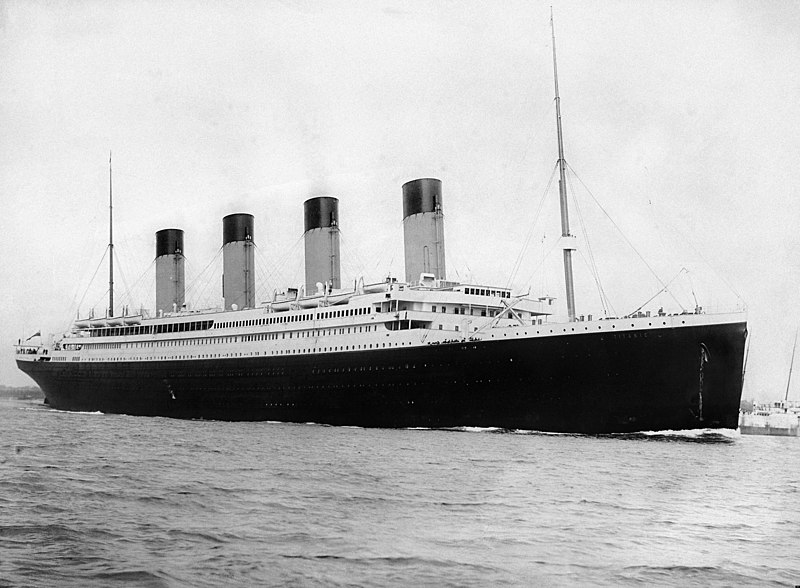

## Introduction and Objectives:

### The analysis aims to explore and gain insights from the Titanic dataset, which contains information about passengers who were on board the ill-fated Titanic. The primary objectives of this analysis are as follows:

### Data Exploration: Understand the dataset's structure, examine missing values, and explore the distribution of key variables, such as age, gender, ticket class, and more.

### Survival Rate: Calculate and visualize the overall survival rate of passengers on the Titanic.

### Ticket Class (Pclass) and Survival: Investigate how the ticket class of passengers relates to their chances of survival.

### Gender and Survival: Analyze the impact of gender on passenger survival, including correlation statistics.

### Age and Survival: Determine the average age of survivors and non-survivors and visualize age distributions.

### Siblings/Spouses (SibSp) and Survival: Explore whether the presence of siblings or spouses affected a passenger's survival rate.

### Port of Embarkation and Survival: Investigate if the port from which passengers embarked had any influence on their chances of survival.

### Fare and Survival: Examine the correlation between passenger fares and their likelihood of survival.

### Age and Ticket Class Correlation: Explore whether there is a correlation between a passenger's age and their ticket class.

### Linear Regression Model: Attempt to build a linear regression model to predict passenger survival based on various features.

### The analysis provides valuable insights into the factors that influenced the survival of Titanic passengers and helps us better understand this historical event.






In [445]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [446]:
#Read in the csv 
train_df = pd.read_csv('train.csv')

In [447]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [448]:
test_df = pd.read_csv('test.csv')

In [449]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [450]:
#Merge both train and test dataset
df = pd.merge(train_df,test_df, how = 'left')

In [451]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [452]:
#Observe the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [453]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [454]:
df.corr()

C:\Users\victo\AppData\Local\Temp\ipykernel_3044\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [455]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Data Dictionary
* survival	Survival	0 = No, 1 = Yes
* pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex	0 = male, 1 = female
* Age	Age in years	
* sibsp	Number of siblings / spouses aboard the Titanic	
* parch	Number of parents / children aboard the Titanic	
* ticket	Ticket number	
* fare	Passenger fare	
* cabin	Cabin number	
* embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### Analysing The Data
* Missing Values
* Exploring Categorical Data
* Exploring Numerical Data
* Exploring Relationships between the features

###### Checking For Missing Values

In [456]:
df.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [457]:
#Checking the features with null values
[features for features in df.columns if df[features].isnull().sum() > 0]

['Age', 'Cabin', 'Embarked']

In [458]:
#Dropping null values
df = df.dropna(subset=['Age', 'Embarked'])

###### Dealing with the categorical data

In [460]:
#encoding the Sex
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [461]:
df['Sex'].unique()

array([0, 1], dtype=int64)

In [462]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [463]:
#Encoding the port of embarkation
df['Embarked'] = df['Embarked'].map({'C':0,'Q':1,'S':2})

In [464]:
df['Embarked'].head()

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64

In [465]:
### Evaluating Numerical data

###### Checking the number Of Males And Females On Board

In [466]:
df['Sex'].value_counts().reset_index().rename(columns = {'index':'Sex', 'Sex':'Count'})

,Sex,Count
0,0,453
1,1,259


<Axes: xlabel='Sex', ylabel='count'>

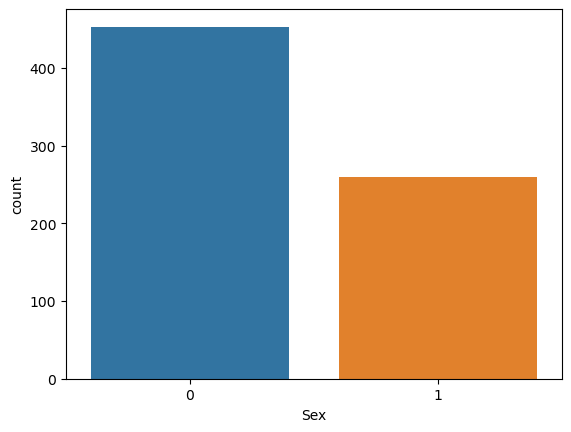

In [467]:
sns.countplot(df, x = 'Sex')

Observation
* There are more females on board than males

### Exploring Relationships Between Features

In [468]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
494,495,0,3,"Stanley, Mr. Edward Roland",0,21.0,0,0,A/4 45380,8.05,NaN,2


In [469]:
survived = (df['Survived'] > 0).sum()

In [470]:
did_not_survive = (df['Survived']<1).sum()

In [471]:
total_number_atrisk = len(df['PassengerId'])

In [472]:
survival_rate = (survived/total_number_atrisk)*100

In [473]:
print(f'The survival rate for the poeple on board was {np.round(survival_rate,2)}%')

The survival rate for the poeple on board was 40.45%


### The survival rate based on different features like Pclass

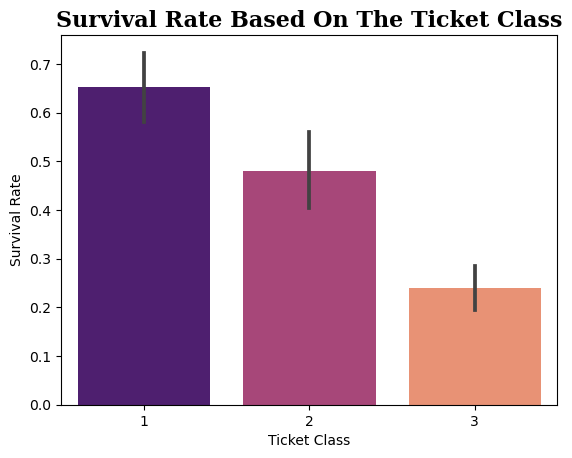

In [474]:
sns.barplot(x='Pclass', y='Survived', data=df, palette= 'magma')
title_font = {
    'family':'serif',
    'size':16,
    'color': 'black',
    'weight':'bold'
}
plt.title('Survival Rate Based On The Ticket Class', fontdict= title_font)
plt.xlabel('Ticket Class')
plt.ylabel('Survival Rate', weight = 'normal')

plt.show()

Observations
* Passengers on first class had a higher survival than other ticket classes
* 3rd class ticket passengers had the lowest survival rate

### The survival rate based on Sex

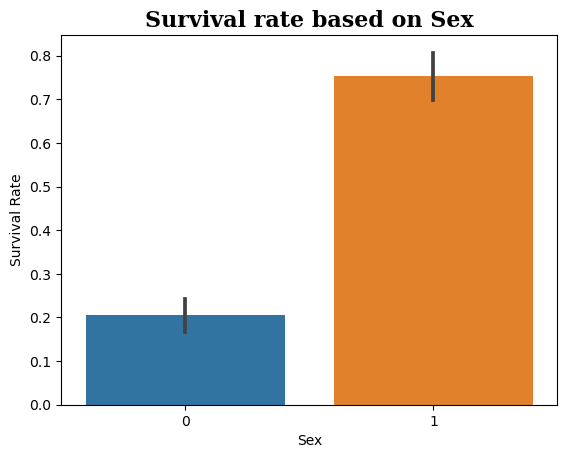

In [475]:
sns.barplot(df,x = 'Sex', y = 'Survived')
title_font = {
    'family':'serif',
    'size':16,
    'color': 'black',
    'weight':'bold'
}
plt.title('Survival rate based on Sex', fontdict= title_font)
plt.xlabel('Sex')
plt.ylabel('Survival Rate', weight = 'normal')

plt.show()

Observation
* Females had a higher survival rate than men

### Survival rate based on SibSp

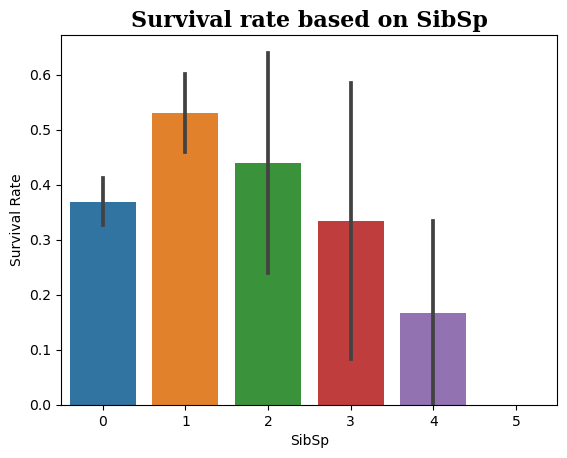

In [476]:
sns.barplot(df, x = 'SibSp', y = 'Survived')
title_font = {
    'family':'serif',
    'size':16,
    'color': 'black',
    'weight':'bold'
}
plt.title('Survival rate based on SibSp', fontdict= title_font)
plt.xlabel('SibSp')
plt.ylabel('Survival Rate', weight = 'normal')

plt.show()

Observations
* Passengers with one sibling or spouse had the highest survival rate
* Passengers with above 4 siblings had the lowest survival rate

### Survival rate based on Parch

<Axes: xlabel='Parch', ylabel='Survived'>

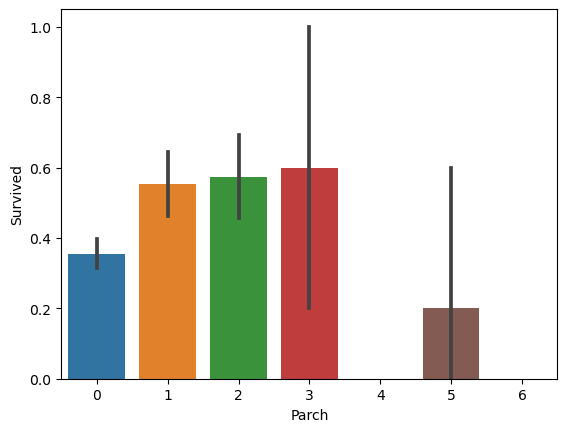

In [477]:
sns.barplot(df,x = 'Parch', y = 'Survived')

### Exploring Numerical Features

#### Using histograms to understand the distribution of Age

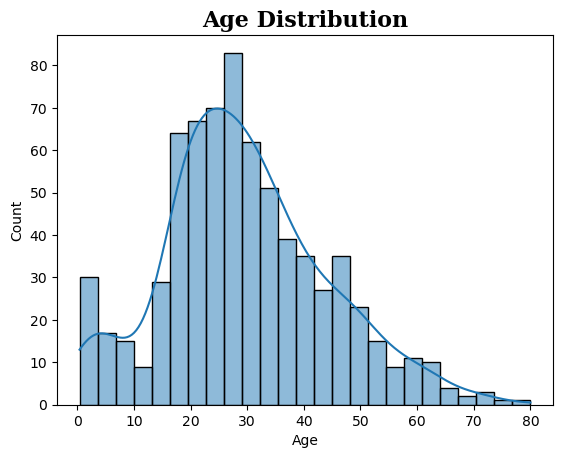

In [478]:
sns.histplot(df, x = 'Age', kde= True, bins=25)
title_font = {
    'family':'serif',
    'size':16,
    'color': 'black',
    'weight':'bold'
}
plt.title('Age Distribution', fontdict= title_font)


plt.show()

Observation
* The highest distribution of ages is between 20-30 years 

#### Using box plots to understand the spread of numerical variables and identify outliers.

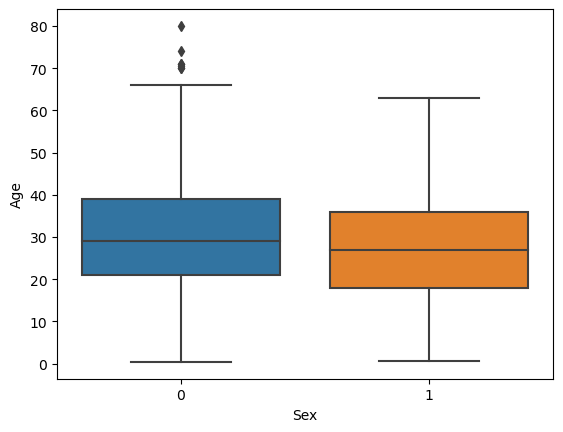

In [479]:
sns.boxplot(df,x = 'Sex', y = 'Age' )
plt.show()

Observation:
* The boxplot indicates that the average age for both men and women is close to 30 years old 
* while there are outliers with very few passengers being around 70 to 80 years old

## Analysis Questions
1. What percentage of passengers survived the Titanic?
2. What was the survival rate for each Pclass?
3. Were gender and survival correlated? Provide statistics.
4. What was the average age of survivors and non-survivors?
5. Did having siblings or spouses on board affect the survival rate?
6. What was the survival rate based on the port of embarkation?
7. How did fare correlate with survival? Did higher fare-paying passengers have better survival?
8. Were age and Pclass correlated? Provide a visualization.
9. What other insights can you draw from the dataset? Provide at least two additional observations supported by data and visualizations.

### What percentage of passengers survived the Titanic?

In [480]:
percentage_of_survivors = df['Survived'].value_counts().reset_index().rename(columns= {'index':'Survived','Survived':'Count'})

In [481]:
percentage_of_survivors

,Survived,Count
0,0,424
1,1,288


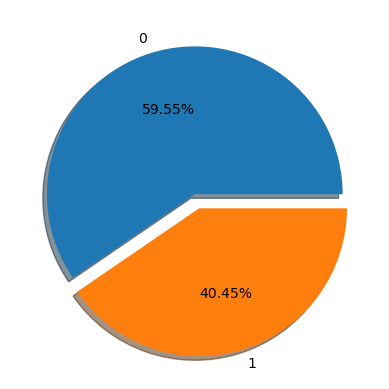

In [482]:
plt.pie(percentage_of_survivors['Count'],labels=percentage_of_survivors['Survived'], autopct= '%1.2f%%', shadow= True, explode = (0,0.1))
plt.show()

###### 38.38% of passengers survived the Titanic

### What was the survival rate for each Pclass?

In [483]:
survival_rate_by_pclass = df.groupby('Pclass')['Survived'].mean()

In [484]:
survival_rate_by_pclass = survival_rate_by_pclass.reset_index().rename(columns = {'Survived':'Survive Percentage'})

In [485]:
survival_rate_by_pclass

,Pclass,Survive Percentage
0,1,0.652174
1,2,0.479769
2,3,0.239437


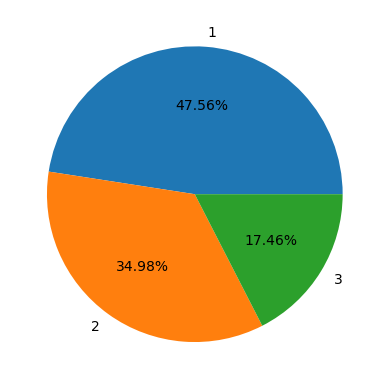

In [486]:
plt.pie(x = survival_rate_by_pclass['Survive Percentage'], labels= survival_rate_by_pclass['Pclass'], autopct='%1.2f%%')
plt.show()

###### 1st class tickets holders had a higher survival rate

### Were gender and survival correlated? Provide statistics

In [487]:
df[['Sex','Survived']].corr()

,Sex,Survived
Sex,1.000000,0.536762
Survived,0.536762,1.000000


<Axes: xlabel='Sex', ylabel='Survived'>

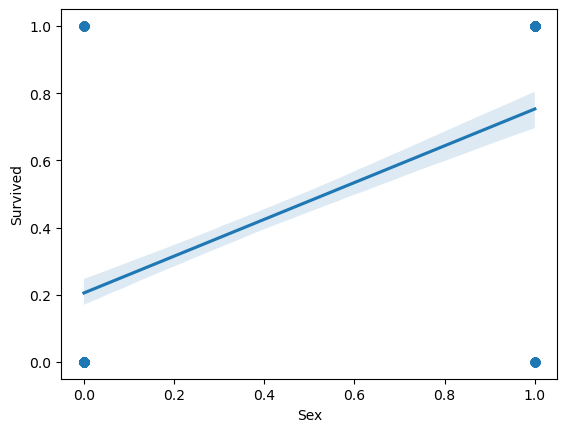

In [488]:
sns.regplot(df, x = 'Sex', y= 'Survived')

###### This indicates a moderate positive correlation between the gender of the passenger and their survival which indicates that being a certain gender did increase your chances of survival

### What was the average age of survivors and non-survivors?

In [489]:
survivors = df[df['Survived'] == 1 ]

In [490]:
non_survivors = df[df['Survived'] == 0 ]

In [491]:
survivors_mean_age = survivors.Age.mean()

In [492]:
print(f'The average age of survivors was {np.round(survivors_mean_age)} years old')

The average age of survivors was 28.0 years old


In [493]:
non_survivors_mean_age = non_survivors.Age.mean()

In [494]:
print(f'The average age of non survivors was {np.round(non_survivors_mean_age)} years old')

The average age of non survivors was 31.0 years old


###### The average age for survivors was 28 and the average age for non survivors was 31

### Did having siblings or spouses on board affect the survival rate?

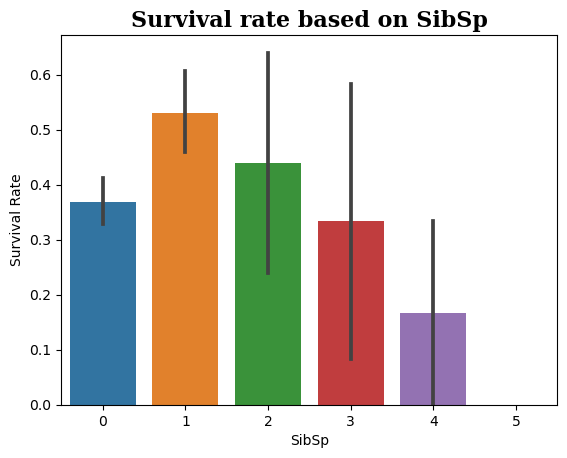

In [495]:
sns.barplot(df, x = 'SibSp', y = 'Survived')
title_font = {
    'family':'serif',
    'size':16,
    'color': 'black',
    'weight':'bold'
}
plt.title('Survival rate based on SibSp', fontdict= title_font)
plt.xlabel('SibSp')
plt.ylabel('Survival Rate', weight = 'normal')

plt.show()

##### It is clearly observed in the barplot that having more siblings/spouses reduces your survival rate

### What was the survival rate based on the port of embarkation?

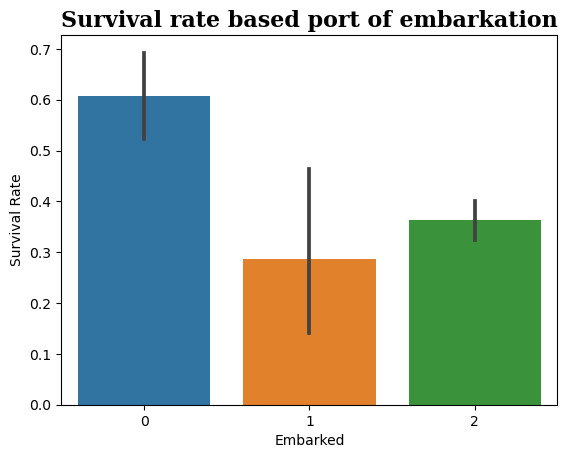

In [496]:
sns.barplot(df, x='Embarked', y= 'Survived')
title_font = {
    'family':'serif',
    'size':16,
    'color': 'black',
    'weight':'bold'
}
plt.title('Survival rate based port of embarkation', fontdict= title_font)
plt.xlabel('Embarked')
plt.ylabel('Survival Rate', weight = 'normal')
plt.show()

###### Passengers whose port of Embarkation was Cherbourg had a higher survival rate than other ports although the reason is unclear

### How did fare correlate with survival? Did higher fare-paying passengers have better survival?

In [497]:
df[['Fare','Survived']].corr()

,Fare,Survived
Fare,1.0000,0.2661
Survived,0.2661,1.0000


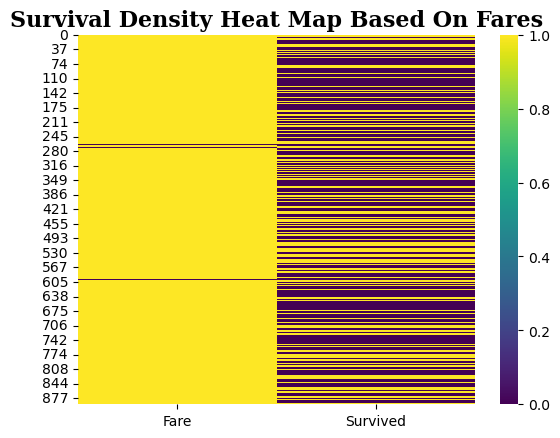

In [498]:
sns.heatmap(df[['Fare','Survived']], vmin=0, vmax=1, cmap='viridis')
title_font = {
    'family':'serif',
    'size':16,
    'color': 'black',
    'weight':'bold'
}
plt.title('Survival Density Heat Map Based On Fares', fontdict= title_font)
plt.show()


###### It is observed that paying a higher fare has weak positive correlation to your survival on the titanic

### Were age and Pclass correlated? Provide a visualization.

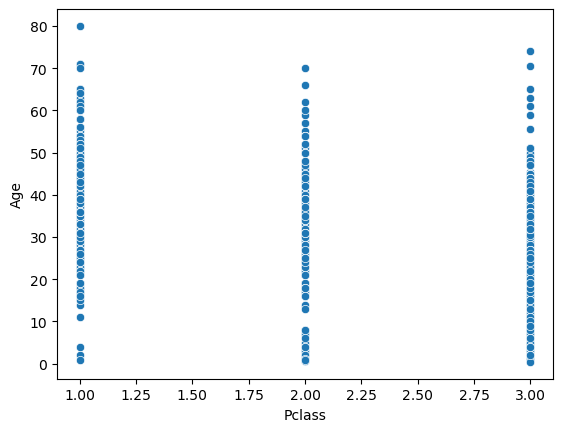

In [499]:
sns.scatterplot(df,x = 'Pclass', y = 'Age')
plt.show()

In [500]:
df[['Age', 'Pclass']].corr()

,Age,Pclass
Age,1.000000,-0.365902
Pclass,-0.365902,1.000000


###### There is a negative correlation between the Pclass and the Age of the Passengers

## Titanic Dataset Survival Analysis Summary

### The analysis aimed to explore and gain insights from the Titanic dataset, providing valuable information about passengers who were on board the Titanic. The primary objectives included data exploration, survival rate calculation, and investigating the impact of various factors on passenger survival.

## Data Exploration:
### Categorical Data: 
#### Categorical data such as gender (converted to numeric), ticket class, and port of embarkation were explored.
#### Numerical Data: Age distribution, spread of numerical variables, and the presence of outliers were examined.

### Key Findings:
#### 1. Survival Rate:
#### Approximately 38.38% of passengers survived the Titanic.

#### 2. Ticket Class (Pclass) and Survival:
####  First-class ticket holders had a higher survival rate compared to second and third-class passengers.

#### 3. Gender and Survival:
#### There was a moderate positive correlation between gender (female) and survival, indicating that being female increased one's chances of survival.

#### 4. Age and Survival:
#### The average age of survivors was around 28 years, while non-survivors had an average age of approximately 31 years.

#### 5. Siblings/Spouses (SibSp) and Survival:
#### Passengers with one sibling or spouse had the highest survival rate, while those with more than four siblings had the lowest survival rate.

#### 6. Port of Embarkation and Survival:
#### Passengers embarking from Cherbourg had a higher survival rate compared to other ports.

#### 7. Fare and Survival:
#### Paying a higher fare had a weak positive correlation with survival, suggesting that passengers with higher fares had a slightly better chance of survival.

#### 8. Age and Ticket Class Correlation:
#### There was a negative correlation between a passenger's age and their ticket class, indicating that younger passengers tended to have higher-class tickets.

### Additional Insights:
#### 1. Age Distribution:
#### The majority of passengers were in the 20-30 years age range.

#### 2. Port of Embarkation:
#### While Cherbourg had the highest survival rate, the reason remains unclear and may require further investigation.

### In conclusion, this analysis provides valuable insights into the factors that influenced passenger survival on the Titanic. Factors such as ticket class, gender, age, and family relationships played a significant role in determining survival rates. Further analysis and model improvement may help uncover more complex relationships within the dataset.

# Linear Regression ML MODEL

In [501]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [502]:
y = df['Survived'].values.reshape((712,1))

In [503]:
y.shape

(712, 1)

In [504]:
y.shape

(712, 1)

In [567]:
X = df[['Pclass','Sex','Age', 'SibSp','Fare','Parch', 'Embarked']]

In [568]:
X.shape

(712, 7)

In [569]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [570]:
from sklearn.linear_model import LinearRegression

In [571]:
model = LinearRegression()

In [572]:
model.fit(X_train, y_train)

LinearRegression()

In [573]:
predictions = model.predict(X_test)

In [596]:
predictions[:5]

array([[0.10332604],
       [0.015947  ],
       [0.36279961],
       [0.47664772],
       [0.06890609]])

In [598]:
y_test[:5]

array([[1],
       [0],
       [0],
       [1],
       [0]], dtype=int64)

In [576]:
# measure the accuracy score
print(f'Accuracy Score = {model.score(X_train,y_train)}')

Accuracy Score = 0.3866035105556057


###### The accuracy score of this model is 0.35, meaning the model's performance is very low

#### Linear Regression Model:
#### A linear regression model was built to predict passenger survival based on features such as ticket class, gender, number of siblings/spouses, fare, and number of parents/children. However, the model's performance was found to be low, with an accuracy score of only 0.35, indicating the need for more sophisticated models or additional feature engineering.

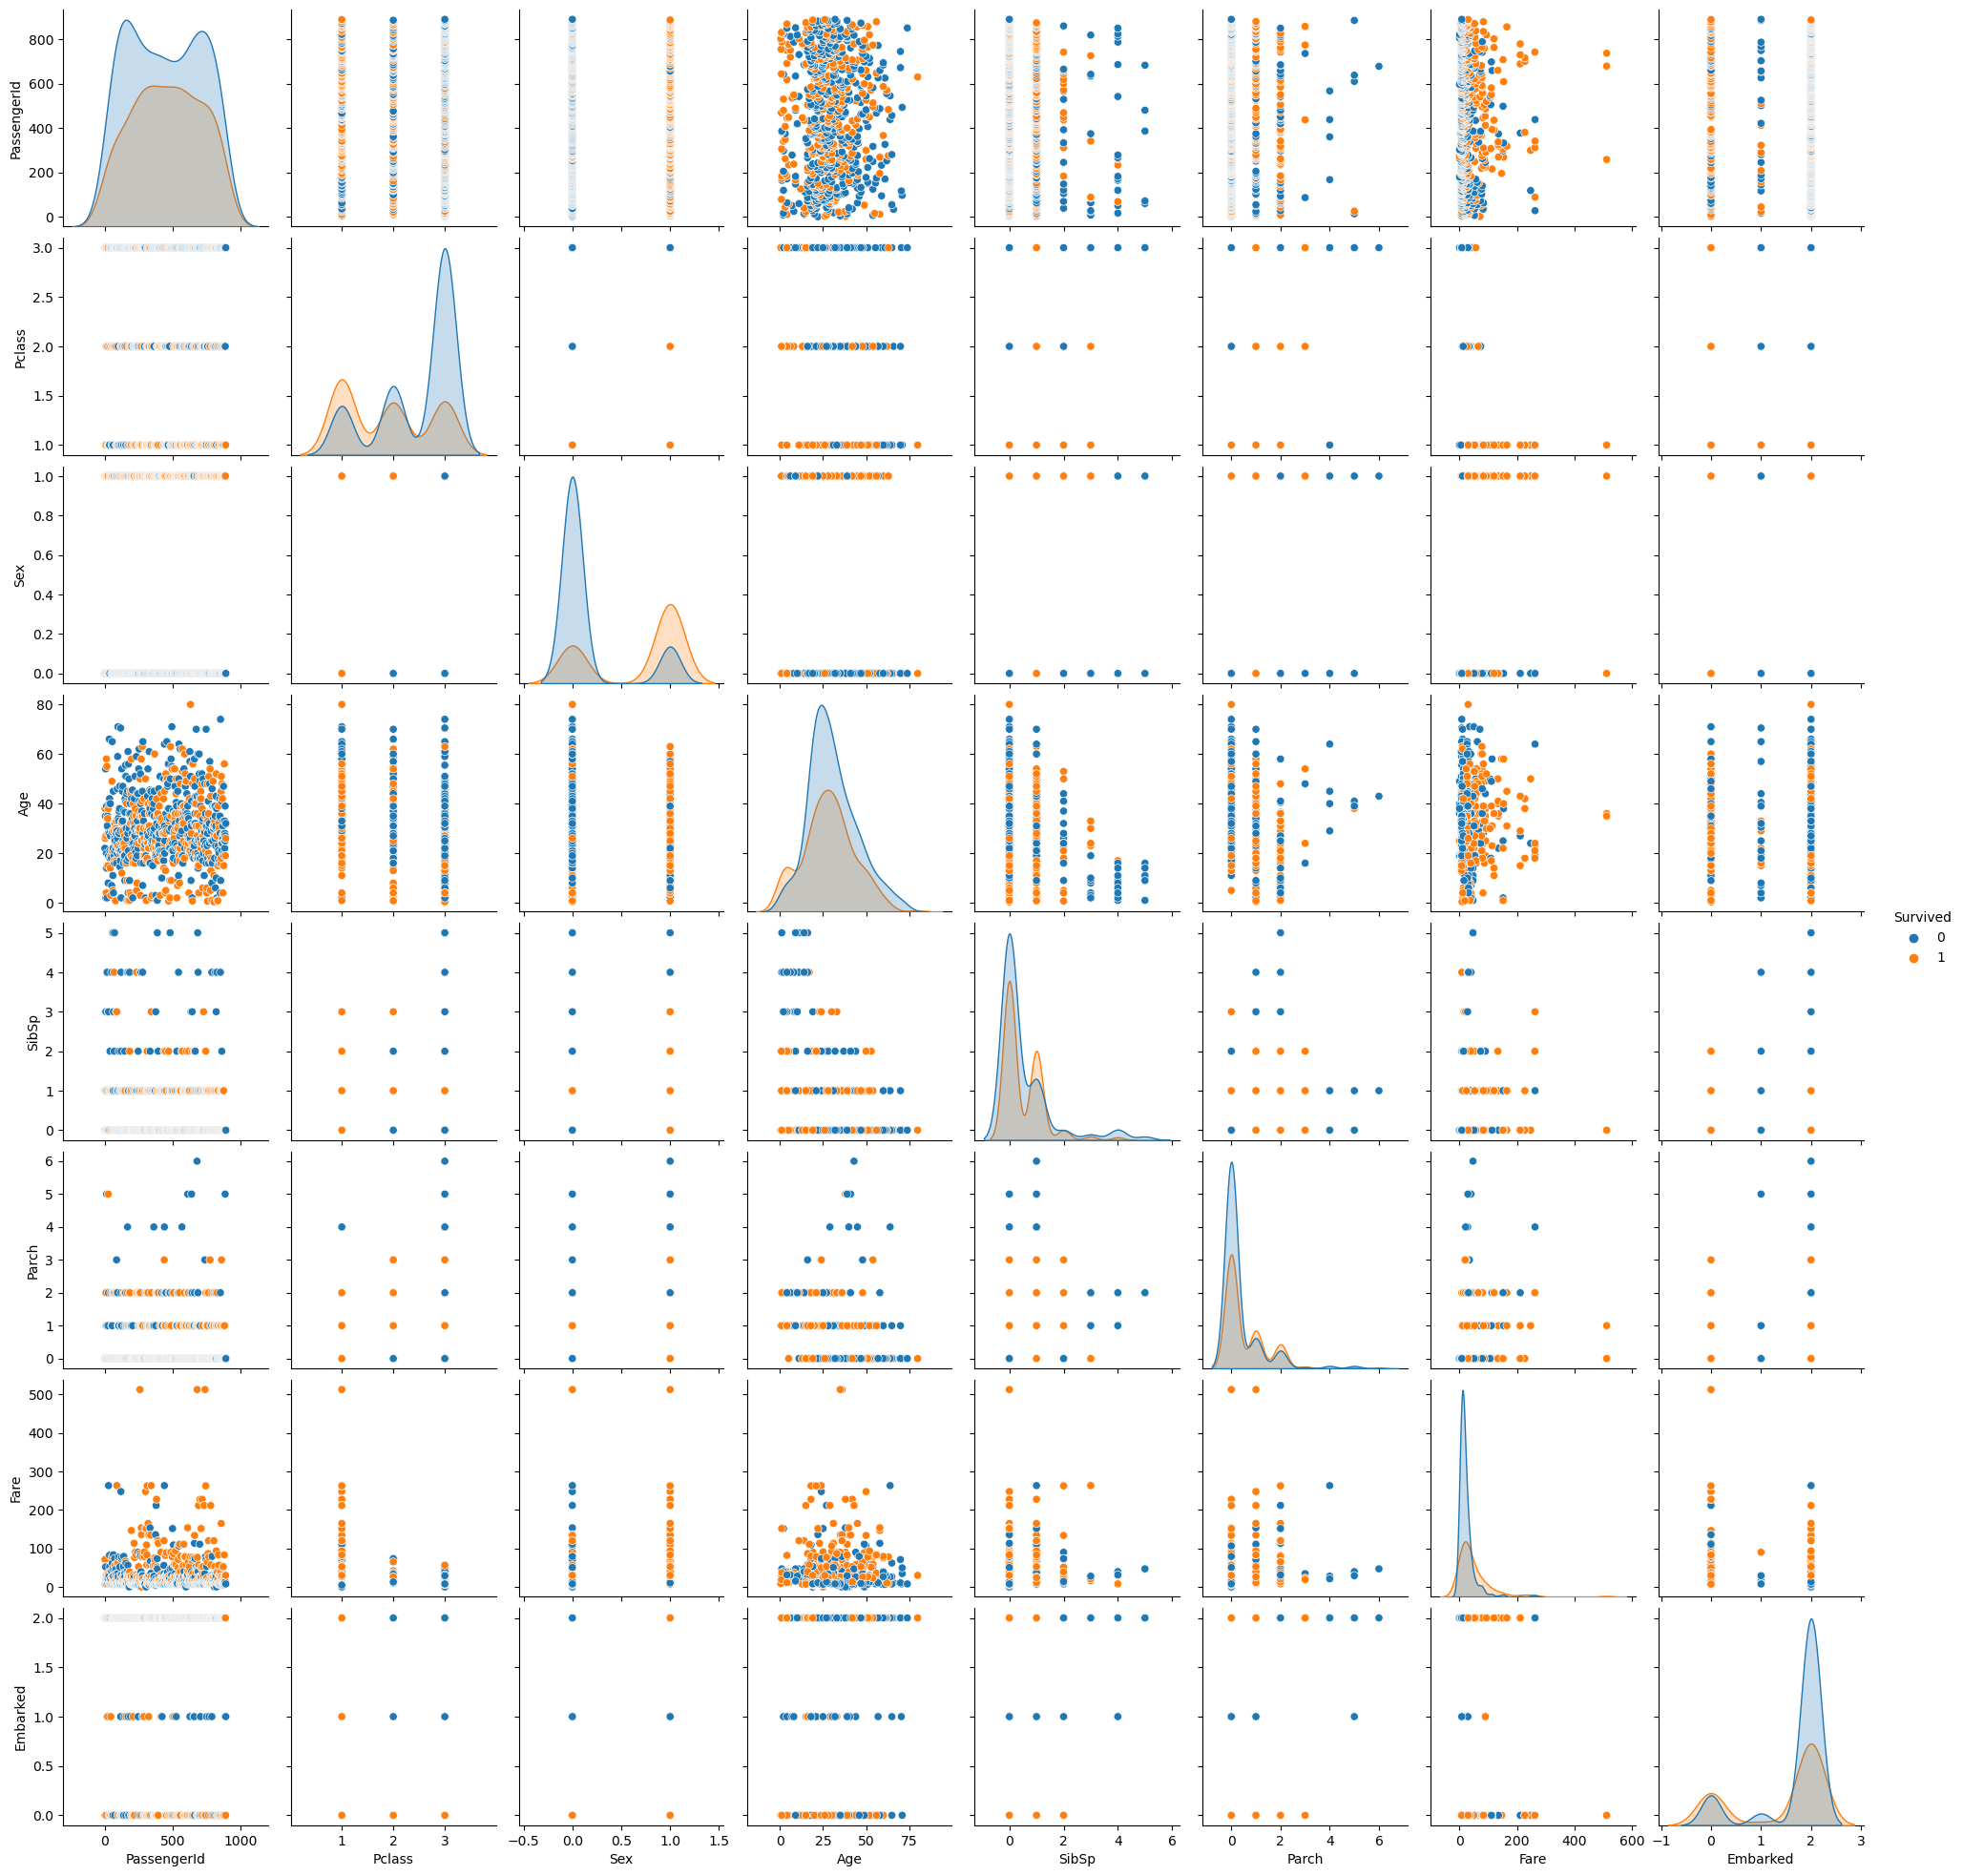

In [577]:
sns.pairplot(df, hue = 'Survived')

## KNN MODEL

In [578]:
from sklearn.preprocessing import StandardScaler

In [579]:
# Scaling the data
scaler = StandardScaler()

In [580]:
scaled_X_train = scaler.fit_transform(X_train)

In [581]:
scaled_X_test = scaler.transform(X_test)

In [582]:
from sklearn.neighbors import KNeighborsClassifier

In [583]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [584]:
knn_model.fit(scaled_X_train,y_train)

C:\Users\victo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [585]:
y_pred = knn_model.predict(scaled_X_test)

In [586]:
from sklearn.metrics import accuracy_score,classification_report

In [600]:
print(f'the accuracy score of this model is {accuracy_score(y_test,y_pred)}')

the accuracy score of this model is 0.8084112149532711


In [588]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       132
           1       0.74      0.77      0.75        82

    accuracy                           0.81       214
   macro avg       0.80      0.80      0.80       214
weighted avg       0.81      0.81      0.81       214



###### Deploying the model

In [589]:
from joblib import dump,load

In [590]:
dump(knn_model,'titanic_survial_model.joblib')

['titanic_survial_model.joblib']

###### loading the model and testing it on a new passenger data

In [591]:
loaded_model = load('titanic_survial_model.joblib')

In [593]:
random_passeanger = [[2,1,27,0,1,50,0]]

In [594]:
loaded_model.predict(random_passeanger)

array([0], dtype=int64)

# Titanic Survival Prediction Model Report

In this report, we present the development of a machine learning model for predicting passenger survival on the Titanic dataset. We will outline the steps involved in building the model, evaluate its performance, and demonstrate its deployment and usage for predicting survival for a new passenger.

## Model Development

### Data Preprocessing

The first step in developing the model involved data preprocessing, which included the following key steps:

- **Data Scaling:** We used the `StandardScaler` from Scikit-Learn to scale the input features. Scaling is crucial to ensure that all features have a consistent scale, which is important for distance-based algorithms like K-Nearest Neighbors (KNN).

### Model Selection and Training

For this task, we chose the K-Nearest Neighbors (KNN) algorithm, which is a simple yet effective classification algorithm. We instantiated a KNN classifier with `n_neighbors=5` and trained it using the scaled training data (`scaled_X_train`) and the corresponding target labels (`y_train`).

### Model Evaluation

The model's performance was evaluated using the test dataset (`scaled_X_test`). We used two key metrics to assess the model:

- **Accuracy Score:** The accuracy score measures the proportion of correctly predicted survival outcomes. In our case, the model achieved an accuracy score of approximately 0.8084, which corresponds to 80.84%.

- **Classification Report:** The classification report provides additional details on model performance, including precision, recall, and F1-score for both survival and non-survival classes. The report also includes support values, representing the number of instances of each class. In our case, we achieved a balanced performance, with good precision and recall for both survival and non-survival classes.

## Model Deployment

### Saving the Model

After training and evaluating the model, we saved it to a file using the `joblib` library. The saved model file is named "titanic_survival_model.joblib" and contains all the necessary information to make predictions.

### Loading and Testing the Model

To demonstrate the model's deployment and usage, we loaded the saved model and tested it with new passenger data. Here are the steps and results:

1. Loading the Model: We loaded the model using the `load` function from `joblib`.

2. Testing with New Data: We created a new dataset representing a passenger with the following features:
   - Ticket Class (Pclass): 2
   - Gender (Sex): Female (1)
   - Age: 27 years
   - Number of Siblings/Spouses (SibSp): 0
   - Number of Parents/Children (Parch): 1
   - Fare: $50
   - Port of Embarkation (Embarked): Southampton (0)

3. Prediction: We used the loaded model to predict the survival outcome for the new passenger data. The model predicted a survival outcome of "0," which indicates that the passenger is not predicted to survive.

## Conclusion

In conclusion, we successfully developed a KNN-based machine learning model for predicting passenger survival on the Titanic dataset. The model achieved an accuracy score of 80.84% and demonstrated balanced precision and recall for both survival and non-survival classes. The model was saved and loaded for deployment, allowing it to make predictions for new passenger data.

This model can be a valuable tool for predicting survival outcomes on similar datasets and can provide insights into the factors that influenced passenger survival during the Titanic disaster. Further improvements and feature engineering could potentially enhance the model's predictive performance.